In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import sys
import buffet as bf

In [3]:
#Import CSV and Create Ticker List
tklist = pd.read_csv('Resources/companylistsp500.csv')
#nasdaq = pd.read_csv('Resources/NASDAQ.txt')
#tickers = pd.merge(nyse,nasdaq,how='outer',on=["Symbol","Symbol"])
tklist.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",09/08/76,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31/03/64,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31/12/12,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",31/05/18,815094,1981 (or pre-1982)
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06/07/11,1467373,1989


In [3]:
len(tklist)

504

In [4]:
#Ask user for first choice (whether build their own portfolio, or have a monkey doing it)
while True:
    fch = input("Do you want to 1) build your own portfolio, or do you want 2) a monkey to help you with? Choose either 1 or 2: ")
    if fch != str(1) and fch != str(2):
        print(f'Please choose a valid option')
        continue
    else:
        break

#User wants to build their own portfolio
if fch == "1":
#Ask how many Companies he/she wants
        while True:
            numInput = input("How many Companies do you want to be in your portfolio?: ")
            if int(numInput) <= 1:
                print("You must have at least two Companies in your portfolio! Please choose again.")
                continue
            else:
                break
    
#Allow the user to input their Companies, limited by numInput
        print(f'If you are not sure which companies are in the S&P 500 Index, please check: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies for more information! ')
        #nyse_df = pd.DataFrame(nyse)
        tckrs = []
        for comps in range(int(numInput)):
                
                compsInput = input(f'Please select your Ticker: ' ).upper()
                tckrs.append(compsInput)



#Corroborate that the Tickers are in the DataFrame
        for x in tckrs:
            tklist.loc[tklist["Symbol"]==x]
            if x not in tklist.values:
                print(f'Ticker {x} does not exist. Please try again.')
                sys.exit("Oops, please review your info and try again")
            else:
                continue
        
        
#Allow the user to input the weight for their choices.
        print(f'Its time to choose the weight for each one of your choices!')
        print(f'To allow this game to function properly, please enter your weights in decimals')
        print(f'And remember, the sum must be exactly 1! Not more, not less')

        wgh = []
        for y in tckrs:
            num_wgh = input(f'Please input weight for {y}: ')
            wgh.append(float(num_wgh))

#Corroborate the conditions of the sum. Sum equal to 1
        a = sum(wgh)
        

        if a > 1:
            print("Sum is greater than 1! Please corroborate your data")
                
        elif a < 1:
            print("Sum is less than 1! Please corroborate your data")
                
        else:
                
            print("Great! We are ready to play! Here is a summary of your choices!")
                
            d = dict(zip(tckrs,wgh))
            #d = {'Ticker':rndm_s,'Weight':wgh}
            #summary_d = pd.DataFrame(d)
            #print(summary_d)
            
            #d = {'Ticker':tckrs,'Weight':wgh}

        #summary_d = pd.DataFrame(d)
        #print(summary_d)
        summary_d = pd.Series(d)
        print(summary_d)

elif fch == "2":
#Ask how many Companies he/she wants
    while True:
        numInput = input("How many Companies do you want to be in your portfolio?: ")
        if int(numInput) <= 1:
            print("You must have at least two Companies in your portfolio! Please choose again.")
            continue
        else:
            break
            
    print('Perfect! lets allow our monkey to do its magic! Here are the monkeys choices: ')
    
    rndm = tklist.sample(n = int(numInput), random_state = 1930)
    rndm_s = list(rndm["Symbol"])
    print(rndm_s)
    
#Ask if they want to input the weight, or if it should be random
    cho2 = input('Do you want to 1) input your own weights, or do you want 2) the monkey to do it? Choose 1 or 2: ')
           
    if cho2 == "1":
        wgh = []
        for y in rndm_s:
            num_wgh = input(f'Please input weight for {y}: ')
            wgh.append(float(num_wgh))
            
#Corroborate the conditions of the sum. Sum equal to 1
         
        a = sum(wgh)

        if a > 1:
            print("Sum is greater than 1! Please corroborate your data")
                
        elif a < 1:
            print("Sum is less than 1! Please corroborate your data")
                
        else:
                
            print("Great! We are ready to play! Here is a summary of your choices!")
                
            d = dict(zip(rndm_s,wgh))
            #d = {'Ticker':rndm_s,'Weight':wgh}
            summary_d = pd.DataFrame(d)
            print(summary_d)


        
#Random choice of weights        
    elif cho2 == "2":
        rs = list(np.random.dirichlet(np.ones(int(numInput)))*1)
    
        print("Great! We are ready to play! Here is a summary of the monkeys choices!")
        
        
        d = dict(zip(rndm_s,rs))
            

        #d = {'Ticker':rndm_s,'Weight':rs}

        summary_d = pd.Series(d)
        print(summary_d)

Do you want to 1) build your own portfolio, or do you want 2) a monkey to help you with? Choose either 1 or 2: 2
How many Companies do you want to be in your portfolio?: 200
Perfect! lets allow our monkey to do its magic! Here are the monkeys choices: 
['UDR', 'HSIC', 'HOLX', 'EQIX', 'MHK', 'AVB', 'IT', 'AIG', 'CSCO', 'FB', 'CNC', 'RF', 'IR', 'A', 'EMN', 'PEG', 'DISCK', 'ZBRA', 'CMCSA', 'JPM', 'INTC', 'TDY', 'LKQ', 'LUV', 'FITB', 'TMO', 'RTX', 'WAB', 'AAPL', 'DLR', 'MS', 'PGR', 'SO', 'DRI', 'EBAY', 'HFC', 'AON', 'BAX', 'WRK', 'UPS', 'LNT', 'AEE', 'NVDA', 'UNH', 'IPGP', 'HON', 'AKAM', 'ALL', 'KHC', 'ADSK', 'FDX', 'MKTX', 'MRO', 'VRSN', 'AMZN', 'MTD', 'GLW', 'DVN', 'PAYX', 'HPQ', 'PNC', 'XYL', 'BWA', 'DRE', 'LRCX', 'F', 'O', 'SPGI', 'SYY', 'TRV', 'BIIB', 'GOOG', 'TYL', 'ALXN', 'TXT', 'PKI', 'NFLX', 'SNPS', 'CTAS', 'PAYC', 'AES', 'BEN', 'EMR', 'J', 'EL', 'BLL', 'SHW', 'DAL', 'INTU', 'MA', 'USB', 'SNA', 'HII', 'HST', 'MCK', 'L', 'CHRW', 'NBL', 'ETR', 'MAR', 'DHI', 'CNP', 'MAA', 'LB', 'CMG'

In [5]:
user = [d]
user

[{'UDR': 0.01817499513681006,
  'HSIC': 0.003347892720516325,
  'HOLX': 0.008220390056652867,
  'EQIX': 0.0004512921538385375,
  'MHK': 0.0003910332524145525,
  'AVB': 0.008508541318801221,
  'IT': 0.002078112227958657,
  'AIG': 0.015714894664825115,
  'CSCO': 0.0026952713850790233,
  'FB': 0.0004359497332666665,
  'CNC': 0.0018820529964006646,
  'RF': 0.00029741554639055724,
  'IR': 0.005940192684881954,
  'A': 0.007068871942060929,
  'EMN': 0.005879453018115173,
  'PEG': 0.0027420572030031707,
  'DISCK': 0.001111821534597723,
  'ZBRA': 0.002178629044694632,
  'CMCSA': 0.004656930420694928,
  'JPM': 0.016221876164945175,
  'INTC': 0.0073258553326115815,
  'TDY': 0.0015104707234646266,
  'LKQ': 0.0005016837096280051,
  'LUV': 0.007028180560914379,
  'FITB': 0.0017267036677302353,
  'TMO': 0.0029759047269107813,
  'RTX': 0.005832733997057834,
  'WAB': 0.006718587620636359,
  'AAPL': 0.00400292937308391,
  'DLR': 0.0071391399892893745,
  'MS': 0.00024303458288581502,
  'PGR': 0.014438689

In [6]:
tickers = list(tklist['Symbol'])
prueba = bf.sp500_returns(symbols=tickers,period='20y')

In [7]:
prueba.to_csv("Resources/prueba.csv", index=False, header=True)

In [7]:
mr = bf.monkey_returns(prueba,user)
mr

[15.178715562670254]

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  27.,  78.,
        109.,  93.,  61.,  57.,  32.,  12.,  10.,   2.,   7.,   4.,   6.,
          2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-4.96522039, -4.52125539, -4.07729039, -3.63332539, -3.18936039,
        -2.74539539, -2.30143039, -1.85746539, -1.41350039, -0.96953539,
        -0.52557039, -0.08160538,  0.36235962,  0.80632462,  1.25028962,
         1.69425462,  2.13821962,  2.58218462,  3.02614962,  3.47011462,
         3.91407962,  4.35

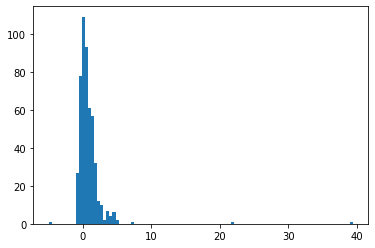

In [8]:
plt.hist(prueba['5yr Return'],bins=100)

In [36]:
intel = yf.Ticker('FE')
intel.history('5y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-08-05,NaN,NaN,NaN,NaN,NaN,0.36,0
2015-08-06,27.62,27.94,27.35,27.91,2660300.0,0.00,0
2015-08-07,27.88,28.43,27.73,28.15,2765600.0,0.00,0
2015-08-10,28.20,28.38,27.96,28.05,1855100.0,0.00,0
2015-08-11,28.05,28.47,28.05,28.10,2166400.0,0.00,0
...,...,...,...,...,...,...,...
2020-07-30,28.42,29.29,28.25,28.87,10784000.0,0.00,0
2020-07-31,28.70,29.20,28.38,29.00,16418900.0,0.00,0
2020-08-03,28.90,29.29,28.48,29.19,8256100.0,0.00,0


In [37]:
type(intel.history('5y'))

pandas.core.frame.DataFrame